# Allen Brain Atlas Adult Human Brain (RNA-Sequencing)

Author: Moshe Silverstein <br/>
Date: 5-17 <br/>
Data Source: http://human.brain-map.org/static/download

In [1]:
import sys, datetime
import os
import re

import numpy as np
import pandas as pd
import importlib
import utility_functions as uf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#from clustergrammer_widget import *
#net = Network(clustergrammer_widget)


from IPython.core.display import clear_output

In [3]:
importlib.reload(uf)

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


<module 'utility_functions' from '/home/charlesdai/Projects/Harmonizome-Data-Processing-Appyters/utility_functions.py'>

# Versions Of Modules In Use

In [4]:
#%load_ext version_information
#%version_information numpy, pandas, clustergrammer_widget

# Functions

In [5]:
def mapSampleData(inputDF, sampleMetaDF, Ontology):
    
    lst = []

    for index in sampleMetaDF.index:
        structure = sampleMetaDF.loc[index, 'ontology_structure_id']
        hemisphere = sampleMetaDF.loc[index, 'hemisphere']
        if type(Ontology.loc[structure, 'name']) == str:
            lst.append(str(Ontology.loc[structure, 'name']))
        else:
            for struc in Ontology.loc[structure, ['name', 'hemisphere']].values:
                if struc[1] == hemisphere:
                    lst.append(str(struc[0]))

    inputDF.columns  = lst

# Donor 9861

# Load Data

In [6]:
matrix_9861 = pd.read_csv('RNAseqCounts.csv', sep=',', header=None, index_col=0)

In [7]:
matrix_9861.head()

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,121
0,,,,,,,,,,,,,,,,,,,,,
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.94,16.43,67.67,...,38.00,52.59,53.89,48.86,81.00,64.00,226.74,128.86,214.95,95.85
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,65.49,...,102.45,81.88,92.86,86.10,36.33,44.25,40.36,24.97,14.68,20.69
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,2.00,...,9.94,8.84,7.94,9.31,3.00,0.00,1.99,5.00,1.01,1.99
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,30.84,...,30.81,28.07,25.69,15.37,39.57,44.70,83.19,86.93,61.43,70.41
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,2781.99,...,1812.89,2628.93,1573.98,1935.88,4892.97,4506.99,6336.45,6727.81,5459.27,8036.99


In [8]:
matrix_9861.shape

(22318, 121)

# Load Sample Metadata

In [9]:
sample_meta_9861 = pd.read_csv('SampleAnnot.csv', sep=',')

In [10]:
sample_meta_9861.head()

,RNAseq_sample_name,replicate_sample,sample_name,well_id,microarray_run_id,ontology_color,main_structure,sub_structure,ontology_structure_id,ontology_structure_acronym,...,brain,million_clusters,clip_percentage,RIN_RNA_quality,rnaseq_run_id,A.Pct,C.Pct,G.Pct,T.Pct,N.Pct
0,S010002_L7.LB16,No,S010002,105,275-104,#FF7B62,PL,SPL,4101,SPL-s,...,1,36.467,6.56,8.0,H15699,25.41,25.22,24.15,25.21,0.01
1,S010003_L7.LB19,No,S010003,113,275-104,#FF7B62,PL,SPL,4101,SPL-s,...,1,52.991,24.45,7.5,V00091,20.87,7.14,26.30,24.34,23.40
2,S010006_L8.LB27,No,S010006,193,275-104,#FF7B62,PL,SPL,4099,SPL-i,...,1,37.405,4.23,7.2,H15699,25.88,24.43,23.74,25.95,0.01
3,S010007_L4.LB20,No,S010007,145,275-104,#FF5D62,PL,AnG-s,4113,AnG-s,...,1,29.974,21.40,6.0,H15699,26.29,25.52,24.35,23.84,0.01
4,S010017_L1.LB2,No,S010017,114,275-104,#E8D959,FL,SFG-l,4027,SFG-l,...,1,34.290,2.26,7.3,H16345,24.97,24.95,24.71,25.36,0.01


In [11]:
sample_meta_9861.shape

(121, 21)

# Load Sample Ontology

In [12]:
sample_onto_9861 = pd.read_csv('Ontology.csv', sep=',', index_col=0)

In [13]:
sample_onto_9861.head()

,acronym,name,parent_structure_id,hemisphere,graph_order,structure_id_path,color_hex_triplet
id,,,,,,,
4005,Br,brain,NaN,NaN,0,/4005/,A0A0A0
4006,GM,gray matter,4005.0,NaN,1,/4005/4006/,787878
4007,Tel,telencephalon,4006.0,NaN,2,/4005/4006/4007/,D988A3
4008,Cx,cerebral cortex,4007.0,NaN,3,/4005/4006/4007/4008/,EDA65F
4009,FL,frontal lobe,4008.0,NaN,4,/4005/4006/4007/4008/4009/,E8CD59


In [14]:
sample_onto_9861.shape

(1839, 7)

# Map Sample Metadata to Sample ID

In [15]:
mapSampleData(matrix_9861, sample_meta_9861, sample_onto_9861)

In [16]:
matrix_9861.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"Crus I, right, lateral hemisphere","IX, right, paravermis","VIIIA, left, lateral hemisphere","VI, left, lateral hemisphere","head of caudate nucleus, right","putamen, right","putamen, right","globus pallidus, external segment, right","globus pallidus, external segment, left","body of caudate nucleus, left"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.94,16.43,67.67,...,38.00,52.59,53.89,48.86,81.00,64.00,226.74,128.86,214.95,95.85
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,65.49,...,102.45,81.88,92.86,86.10,36.33,44.25,40.36,24.97,14.68,20.69
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,2.00,...,9.94,8.84,7.94,9.31,3.00,0.00,1.99,5.00,1.01,1.99
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,30.84,...,30.81,28.07,25.69,15.37,39.57,44.70,83.19,86.93,61.43,70.41
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,2781.99,...,1812.89,2628.93,1573.98,1935.88,4892.97,4506.99,6336.45,6727.81,5459.27,8036.99


# Donor 10021

# Load Data

In [17]:
matrix_10021 = pd.read_csv('RNAseqCounts-2.csv', sep=',', header=None, index_col=0)

In [18]:
matrix_10021.head()

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,121
0,,,,,,,,,,,,,,,,,,,,,
A1BG,84.92,143.85,88.59,110.00,87.07,122.25,103.65,106.91,191.16,162.56,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,107.12,108.52,96.26,96.43,98.79,91.09,110.81,140.31,198.17,156.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,13.25,5.09,4.58,4.03,1.00,3.00,2.99,1.00,7.00,4.25,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,53.26,72.54,54.20,49.50,46.60,54.83,48.51,68.45,84.89,50.57,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,3813.83,3582.94,3907.99,3892.90,3592.06,4742.55,3811.88,5890.89,5856.88,4077.96,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


In [19]:
matrix_10021.shape

(22318, 121)

# Load Sample Metadata

In [20]:
sample_meta_10021 = pd.read_csv('SampleAnnot-2.csv', sep=',')

In [21]:
sample_meta_10021.head()

,RNAseq_sample_name,replicate_sample,sample_name,well_id,microarray_run_id,ontology_color,main_structure,sub_structure,ontology_structure_id,ontology_structure_acronym,...,brain,million_clusters,clip_percentage,RIN_RNA_quality,rnaseq_run_id,A.Pct,C.Pct,G.Pct,T.Pct,N.Pct
0,S020008_L7.LB13,No,S020008,4569,275-201,#E8D959,FL,SFG-l,4024,SFG-l,...,2,33.696,1.86,8.6,H15601,25.38,24.74,24.20,25.68,0.00
1,S020013_L7.LB3,No,S020013,4514,275-201,#E8D959,FL,SFG-m,4026,SFG-m,...,2,36.747,6.03,8.3,H15967,25.66,24.65,23.89,25.80,0.01
2,S020019_L2.LB9,No,S020019,4562,275-201,#E8D959,FL,SFG-l,4024,SFG-l,...,2,33.115,2.33,8.6,H15602,25.54,24.69,23.89,25.88,0.01
3,S020024_L8.LB22,No,S020024,4602,275-205,#E8C659,FL,orIFG,4045,orIFG,...,2,35.500,2.51,8.2,H15601,25.54,24.63,23.99,25.83,0.00
4,S020027_L6.LB6,No,S020027,4531,275-201,#E8C659,FL,orIFG,4046,orIFG,...,2,30.290,1.44,8.0,H15602,25.28,24.85,24.13,25.74,0.00


In [22]:
sample_meta_10021.shape

(121, 21)

# Load Sample Ontology

In [23]:
sample_onto_10021 = pd.read_csv('Ontology-2.csv', sep=',', index_col=0)

In [24]:
sample_onto_10021.head()

,acronym,name,parent_structure_id,hemisphere,graph_order,structure_id_path,color_hex_triplet
id,,,,,,,
4005,Br,brain,NaN,NaN,0,/4005/,A0A0A0
4006,GM,gray matter,4005.0,NaN,1,/4005/4006/,787878
4007,Tel,telencephalon,4006.0,NaN,2,/4005/4006/4007/,D988A3
4008,Cx,cerebral cortex,4007.0,NaN,3,/4005/4006/4007/4008/,EDA65F
4009,FL,frontal lobe,4008.0,NaN,4,/4005/4006/4007/4008/4009/,E8CD59


In [25]:
sample_onto_10021.shape

(1839, 7)

# Map Sample Metadata to Sample ID

In [26]:
mapSampleData(matrix_10021, sample_meta_10021, sample_onto_10021)

In [27]:
matrix_10021.head()

,"superior frontal gyrus, left, lateral bank of gyrus","superior frontal gyrus, right, medial bank of gyrus","superior frontal gyrus, left, lateral bank of gyrus","inferior frontal gyrus, orbital part, left","inferior frontal gyrus, orbital part, right","medial orbital gyrus, left","medial orbital gyrus, right","middle frontal gyrus, right, inferior bank of gyrus","middle frontal gyrus, right, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,84.92,143.85,88.59,110.00,87.07,122.25,103.65,106.91,191.16,162.56,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,107.12,108.52,96.26,96.43,98.79,91.09,110.81,140.31,198.17,156.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,13.25,5.09,4.58,4.03,1.00,3.00,2.99,1.00,7.00,4.25,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,53.26,72.54,54.20,49.50,46.60,54.83,48.51,68.45,84.89,50.57,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,3813.83,3582.94,3907.99,3892.90,3592.06,4742.55,3811.88,5890.89,5856.88,4077.96,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


# Combine Donor Datasets

# Unfiltered

In [28]:
matrix = pd.concat([matrix_9861, matrix_10021], axis=1)

In [29]:
matrix.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.94,16.43,67.67,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,65.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,2.00,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,30.84,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,2781.99,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


In [30]:
matrix.shape

(22318, 242)

# Save Unfiltered to file

In [31]:
if not os.path.exists('Output'):
    os.makedirs('Output')
filename = 'Output/aba_brain_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [32]:
normalized_matrix = pd.concat([matrix_9861, matrix_10021], axis=1)

In [33]:
normalized_matrix.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.94,16.43,67.67,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,65.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,2.00,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,30.84,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,2781.99,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


In [34]:
normalized_matrix.shape

(22318, 242)

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [35]:
normalized_matrix = uf.removeAndImpute(normalized_matrix)

In [36]:
normalized_matrix.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.940000,16.430000,67.67,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.800000,24.870000,65.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,3.938276,3.938276,2.00,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.900000,10.470000,30.84,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.980000,1676.990000,2781.99,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


In [37]:
normalized_matrix.shape

(19944, 242)

# Log2 Transform

In [38]:
normalized_matrix = uf.log2(normalized_matrix)

In [39]:
normalized_matrix.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
A1BG,5.692650,6.220717,5.464342,5.171127,6.094236,5.781360,5.987093,5.726286,4.123501,6.101608,...,7.035844,6.714246,7.504779,7.167820,6.911811,6.627753,6.558421,6.707083,6.397632,6.743219
A1BG-AS1,6.674828,7.098980,6.415657,5.831624,6.513333,4.781884,6.640823,6.145677,4.693208,6.055065,...,6.680746,5.602291,5.104337,4.945327,6.607626,6.085765,5.943453,6.633577,6.219943,6.496654
A1CF,2.046142,2.003602,2.782409,1.000000,2.518535,1.584963,1.014355,2.304007,2.304007,1.584963,...,1.584963,1.000000,1.992768,1.000000,2.825786,3.558268,3.617063,3.582556,3.324811,3.818646
A2LD1,4.799087,6.081510,5.649041,4.667324,5.258142,5.192194,5.349790,4.578939,3.519793,4.992768,...,6.483655,6.015248,6.847496,6.563006,5.870118,6.064366,6.169123,5.944858,4.781884,5.820945
A2M,10.870365,11.736618,11.414669,9.891738,11.556956,11.206147,11.205176,11.689116,10.712518,11.442420,...,12.000335,12.313725,13.201962,13.011042,12.098332,11.374882,11.674629,11.740780,11.113006,11.311743


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = uf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
A1BG,5.814335,5.764678,5.543387,5.922453,6.079485,6.425478,6.157764,5.603096,4.959044,6.360838,...,6.731761,6.591732,7.622731,6.994467,6.754554,6.761738,6.505992,6.622346,6.712980,6.817244
A1BG-AS1,6.787162,6.600013,6.443964,6.565631,6.505992,5.476644,6.764689,6.002303,5.550663,6.315380,...,6.370899,5.431815,5.179612,4.759179,6.400647,6.218059,5.896294,6.549653,6.554084,6.598099
A1CF,2.272540,1.961761,2.858834,0.993705,2.506328,1.606622,1.014306,2.213123,2.740729,1.530107,...,1.518466,0.995057,1.892076,0.995057,2.679367,3.701940,3.655742,3.511718,3.663745,4.021897
A2LD1,4.918024,5.618904,5.715986,5.397897,5.242534,5.883958,5.520630,4.480467,4.314778,5.241778,...,6.156091,5.860566,6.943549,6.366935,5.650747,6.205259,6.101906,5.860566,5.154044,5.953363
A2M,10.818052,11.164074,11.370205,10.520038,11.490873,11.643852,11.205594,11.474877,11.492196,11.568740,...,11.757689,12.330991,13.387116,12.891794,12.019407,11.340221,11.454073,11.504804,11.261822,11.190165


# Normalize Matrix (z-score the rows)

In [42]:
uf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
A1BG,-1.163256,-1.253627,-1.656356,-0.966491,-0.680707,-0.051034,-0.538248,-1.547692,-2.719805,-0.168671,...,0.506373,0.251533,2.127855,0.984474,0.547855,0.560928,0.095495,0.307248,0.472193,0.661945
A1BG-AS1,0.587762,0.048175,-0.401744,-0.050955,-0.222905,-3.190712,0.522968,-1.675137,-2.977300,-0.772477,...,-0.612405,-3.319962,-4.047112,-5.259302,-0.526635,-1.053071,-1.980781,-0.097021,-0.084246,0.042657
A1CF,0.261860,-0.204032,1.140779,-1.655254,0.612333,-0.736423,-1.624371,0.172788,0.963727,-0.851128,...,-0.868580,-1.653227,-0.308497,-1.653227,0.871739,2.404687,2.335431,2.119524,2.347428,2.884338
A2LD1,-1.735814,-0.073498,0.156757,-0.597671,-0.966155,0.555145,-0.306579,-2.773591,-3.166564,-0.967948,...,1.200578,0.499665,3.068235,1.700650,0.002027,1.317194,1.072065,0.499665,-1.176032,0.719757
A2M,-2.560651,-1.678269,-1.152619,-3.320610,-0.844908,-0.454799,-1.572389,-0.885698,-0.841533,-0.646339,...,-0.164506,1.297458,3.990655,2.727547,0.502893,-1.229081,-0.938750,-0.809382,-1.429005,-1.611735


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = uf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19944, 100)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
uf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18734, 100)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = uf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18629, 100)

# Histogram of First Sample

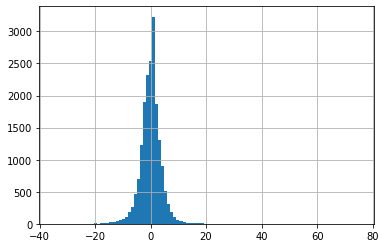

In [50]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

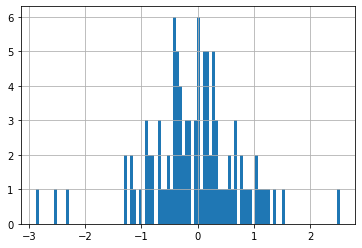

In [51]:
normalized_matrix.loc[normalized_matrix.index[0]].hist(bins=100)

# Save Filtered Matrix

In [52]:
filename = 'Output/aba_brain_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = uf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1BG-AS1,503538
2,A1CF,29974
3,A2M,2
4,A2ML1,144568


In [55]:
gene_list.shape

(18629, 2)

# Save Gene List

In [56]:
filename = 'Output/aba_brain_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Attribute List

In [57]:
attribute_list = uf.createAttributeList(normalized_matrix)

In [58]:
attribute_list.head()

""
Attributes
"Crus I, right, lateral hemisphere"
"Crus II, left, lateral hemisphere"
"IV, right, paravermis"
"IX, right, paravermis"
"VI, left, lateral hemisphere"


In [59]:
attribute_list.shape

(100, 0)

# Save Attribute List

In [60]:
filename = 'Output/aba_brain_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [61]:
standard_matrix = uf.createStandardizedMatrix(normalized_matrix)

In [62]:
standard_matrix.head()

,"Crus I, right, lateral hemisphere","Crus II, left, lateral hemisphere","IV, right, paravermis","IX, right, paravermis","VI, left, lateral hemisphere","VIIB, left, paravermis","VIIIA, left, lateral hemisphere","VIIIA, right, lateral hemisphere","angular gyrus, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus",...,"superior frontal gyrus, right, medial bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior temporal gyrus, left, inferior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","superior temporal gyrus, right, inferior bank of gyrus","superior temporal gyrus, right, lateral bank of gyrus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, right, inferior bank of gyrus"
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.922423,0.697703,0.337760,-0.682128,-0.782216,0.577699,-0.402195,0.637810,-0.062208,-0.642160,...,0.057828,-0.842307,0.677767,0.317779,-0.462173,0.917793,0.457814,-0.702173,0.137830,0.237795
A1BG-AS1,0.835769,0.055747,-0.564229,-0.024331,0.395725,-0.164296,0.815756,-0.584223,-0.004277,0.135749,...,-0.124248,-0.224178,-0.084253,0.295724,0.675685,0.755685,-0.044335,0.495708,0.915711,0.595697
A1CF,0.969015,0.989061,0.868917,0.848949,0.948986,0.908907,0.888880,0.928969,0.028857,0.048942,...,0.168942,0.768894,0.748881,0.008863,0.348888,0.588893,-0.351070,-0.291083,0.528879,0.268909
A2M,-0.971276,-0.931309,-0.711059,-0.851193,-0.951250,-0.911237,-0.991246,-0.891265,-0.651046,-0.831188,...,-0.151026,-0.571033,-0.631012,-0.871143,0.028857,0.448928,-0.331073,-0.771119,-0.671033,-0.011081
A2ML1,-0.991246,-0.871143,-0.971276,-0.911237,-0.851193,-0.891265,-0.811131,-0.951250,0.488904,-0.571033,...,0.308893,0.088969,-0.631012,-0.711059,0.048942,-0.731084,-0.191058,-0.511092,-0.331073,-0.391060


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

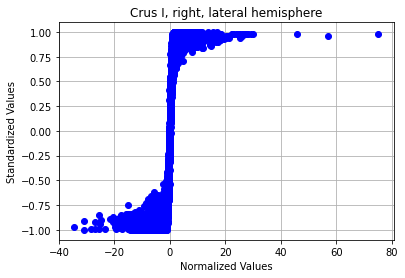

In [63]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [64]:
filename = 'Output/aba_brain_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [65]:
tertiary_matrix = uf.createTertiaryMatrix(standard_matrix)

In [66]:
tertiary_matrix.head()

,"Crus I, right, lateral hemisphere","Crus II, left, lateral hemisphere","IV, right, paravermis","IX, right, paravermis","VI, left, lateral hemisphere","VIIB, left, paravermis","VIIIA, left, lateral hemisphere","VIIIA, right, lateral hemisphere","angular gyrus, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus",...,"superior frontal gyrus, right, medial bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior temporal gyrus, left, inferior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","superior temporal gyrus, right, inferior bank of gyrus","superior temporal gyrus, right, lateral bank of gyrus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, right, inferior bank of gyrus"
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,-1,0,0,0,-1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,-1,0,-1,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [67]:
filename = 'Output/aba_brain_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Path to output files

In [68]:
path = 'Output/'

# Create Up Gene Set Library

In [69]:
name = 'aba_brain_gene_up_set'

In [70]:
uf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'aba_brain_gene_down_set'

In [72]:
uf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'aba_brain_attribute_up_set'

In [74]:
uf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'aba_brain_attribute_down_set'

In [76]:
uf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [77]:
attribute_similarity_matix = uf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [78]:
attribute_similarity_matix.head()

,"Crus I, right, lateral hemisphere","Crus II, left, lateral hemisphere","IV, right, paravermis","IX, right, paravermis","VI, left, lateral hemisphere","VIIB, left, paravermis","VIIIA, left, lateral hemisphere","VIIIA, right, lateral hemisphere","angular gyrus, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus",...,"superior frontal gyrus, right, medial bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior temporal gyrus, left, inferior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","superior temporal gyrus, right, inferior bank of gyrus","superior temporal gyrus, right, lateral bank of gyrus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, right, inferior bank of gyrus"
,,,,,,,,,,,,,,,,,,,,,
"Crus I, right, lateral hemisphere",1.000000,0.778316,0.792658,0.779115,0.770542,0.749345,0.797985,0.779581,-0.078460,-0.067099,...,-0.116604,0.054818,0.012224,-0.017742,-0.074562,-0.115803,-0.055964,-0.043145,-0.168097,-0.126852
"Crus II, left, lateral hemisphere",0.778316,1.000000,0.825359,0.764161,0.771405,0.801527,0.765832,0.815648,-0.070913,-0.078772,...,-0.144303,0.002575,0.042688,-0.037377,-0.060915,-0.051392,-0.037284,-0.029841,-0.151340,-0.072516
"IV, right, paravermis",0.792658,0.825359,1.000000,0.784684,0.783532,0.815792,0.780317,0.847876,-0.082594,-0.071028,...,-0.141309,0.026376,0.028359,-0.013538,-0.084487,-0.062059,-0.034315,-0.052829,-0.159519,-0.093262
"IX, right, paravermis",0.779115,0.764161,0.784684,1.000000,0.769564,0.747676,0.775367,0.759840,-0.073664,-0.062163,...,-0.106258,0.054005,0.003930,-0.018243,-0.063787,-0.097311,-0.038560,-0.040279,-0.139793,-0.090300
"VI, left, lateral hemisphere",0.770542,0.771405,0.783532,0.769564,1.000000,0.732919,0.783193,0.766199,-0.047580,-0.035069,...,-0.132056,-0.005787,-0.007218,-0.036182,-0.016951,-0.043132,-0.029242,-0.017188,-0.117330,-0.063791


# Save Attribute Similarity Matrix

In [79]:
filename = 'Output/aba_brain_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

In [80]:
#net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
#net.cluster()
#net.widget()

# Create Gene Similarity Matrix

In [81]:
gene_similarity_matix = uf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [82]:
gene_similarity_matix.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.342883,-0.137559,0.291290,0.161037,0.310286,0.049806,0.287478,-0.260180,-0.081023,...,-0.512385,0.057276,-0.135240,-0.472685,0.073003,-0.068470,-0.463751,-0.294840,0.170540,0.288265
A1BG-AS1,-0.342883,1.000000,0.234475,-0.693921,-0.321973,-0.509224,0.140274,-0.390250,0.657398,0.235363,...,0.690354,0.353552,-0.232642,0.431680,-0.264469,0.062877,0.635560,0.499914,-0.082499,-0.579526
A1CF,-0.137559,0.234475,1.000000,-0.474102,-0.625239,-0.528976,0.002461,0.203840,-0.293207,-0.425337,...,0.240531,-0.440615,0.560966,0.556571,0.585660,0.601953,0.359816,0.248168,0.600464,-0.081331
A2M,0.291290,-0.693921,-0.474102,1.000000,0.519521,0.823891,-0.028206,0.340544,-0.376534,0.115265,...,-0.798006,-0.003872,-0.226837,-0.716884,-0.112496,-0.311834,-0.791688,-0.327352,-0.224270,0.346273
A2ML1,0.161037,-0.321973,-0.625239,0.519521,1.000000,0.601655,0.015559,-0.141567,0.154063,0.253178,...,-0.334900,0.347862,-0.386271,-0.658250,-0.438606,-0.616953,-0.453238,-0.507369,-0.641301,0.167888


# Save Gene Similarity Matrix

In [83]:
#filename = 'Output/aba_brain_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
#gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [84]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/'

In [85]:
name = 'aba_brain_gene_attribute_edge_list'

In [86]:
uf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/aba_brain_gene_attribute_edge_list_2020_06.tsv'